<a href="https://colab.research.google.com/github/AshuPraja13/Data-Science/blob/main/Face_Recogniaton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Face Recorgniation usign dataset-<br>
https://www.kaggle.com/datasets/vasukipatel/face-recognition-dataset

Importing dataset

In [1]:
import kaggle

OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.

In [4]:
!mv kaggle.json /root/.kaggle

mv: cannot stat 'kaggle.json': No such file or directory


In [5]:
import kaggle

In [6]:
!kaggle datasets download -d vasukipatel/face-recognition-dataset

100% 725M/726M [00:32<00:00, 24.5MB/s]
100% 726M/726M [00:32<00:00, 23.4MB/s]


In [7]:
!unzip -q /content/face-recognition-dataset.zip

Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import cv2
import os

Using Image agumentaiton to create a balanced dataset by saving the augumented image to the main directory

In [2]:
df = pd.read_csv('Dataset.csv')
df

id             label
0     Robert Downey Jr_87.jpg  Robert Downey Jr
1          Lisa Kudrow_64.jpg       Lisa Kudrow
2      Ellen Degeneres_34.jpg   Ellen Degeneres
3         Billie Eilish_3.jpg     Billie Eilish
4       Hrithik Roshan_35.jpg    Hrithik Roshan
...                       ...               ...
2557      Jessica Alba_90.jpg      Jessica Alba
2558   Elizabeth Olsen_27.jpg   Elizabeth Olsen
2559   Elizabeth Olsen_59.jpg   Elizabeth Olsen
2560       Henry Cavill_7.jpg      Henry Cavill
2561       Claire Holt_29.jpg       Claire Holt

[2562 rows x 2 columns]

In [3]:
idg = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range= 30,
                                                      width_shift_range=0.2, height_shift_range=0.2,
                                                      brightness_range=(0.8,1.2),
                                                      zoom_range=(0.8,1.2), horizontal_flip=True,)

In [4]:
for i in os.listdir("/content/Original Images/Original Images/"):
  print(i,len(os.listdir(f'/content/Original Images/Original Images/{i}')))

Elizabeth Olsen 120
Hugh Jackman 120
Lisa Kudrow 120
Robert Downey Jr 120
Vijay Deverakonda 120
Charlize Theron 120
Kashyap 120
Amitabh Bachchan 120
Alexandra Daddario 120
Andy Samberg 120
Virat Kohli 120
Tom Cruise 120
Billie Eilish 120
Priyanka Chopra 120
Hrithik Roshan 120
Ellen Degeneres 120
Brad Pitt 120
Anushka Sharma 120
Courtney Cox 120
Akshay Kumar 120
Jessica Alba 120
Henry Cavill 120
Zac Efron 120
Camila Cabello 120
Marmik 120
Alia Bhatt 120
Dwayne Johnson 120
Margot Robbie 120
Natalie Portman 120
Roger Federer 120
Claire Holt 120


In [5]:
for i in range(len(120-df['label'].value_counts())):
  loc = pd.DataFrame(df['label'].value_counts()).index[i]
  train_idg = idg.flow_from_dataframe(df[df['label']==loc],f'/content/Original Images/Original Images/{loc}', 'id', 'label',
                                    target_size=(160,160), batch_size = 1,shuffle=False)
  for j in range(120-df['label'].value_counts()[i]):
    X,y  = train_idg.next()
    X = np.squeeze(X.astype(int),axis=0)
    X = np.float32(X)
    cv2.imwrite(f'/content/Original Images/Original Images/{loc}/augumented_{j}.jpg',cv2.cvtColor(X, cv2.COLOR_BGR2RGB))

Found 120 validated image filenames belonging to 1 classes.
Found 115 validated image filenames belonging to 1 classes.
Found 113 validated image filenames belonging to 1 classes.
Found 112 validated image filenames belonging to 1 classes.
Found 108 validated image filenames belonging to 1 classes.
Found 106 validated image filenames belonging to 1 classes.
Found 105 validated image filenames belonging to 1 classes.
Found 102 validated image filenames belonging to 1 classes.
Found 101 validated image filenames belonging to 1 classes.
Found 98 validated image filenames belonging to 1 classes.
Found 96 validated image filenames belonging to 1 classes.
Found 92 validated image filenames belonging to 1 classes.
Found 92 validated image filenames belonging to 1 classes.
Found 91 validated image filenames belonging to 1 classes.
Found 87 validated image filenames belonging to 1 classes.
Found 80 validated image filenames belonging to 1 classes.
Found 79 validated image filenames belonging to

In [6]:
tf.keras.preprocessing.image.img_to_array(tf.keras.preprocessing.image.load_img('/content/Original Images/Original Images/Akshay Kumar/augumented_19.jpg')).shape

(160, 160, 3)

Making a training and validation data with the help of Image Daga Generator

In [7]:
idg = tf.keras.preprocessing.image.ImageDataGenerator(validation_split=0.1)

In [8]:
batch_size = 32

In [9]:
train_idg = idg.flow_from_directory('/content/Original Images/Original Images',target_size=(160,160), batch_size = batch_size,
                                    shuffle=True, subset='training')

Found 3348 images belonging to 31 classes.


In [10]:
val_idg = idg.flow_from_directory('/content/Original Images/Original Images',target_size=(160,160), batch_size = batch_size,
                                    shuffle=False, subset='validation',)

Found 372 images belonging to 31 classes.


In [11]:
ind = {values: key for key,values in train_idg.class_indices.items()}
ind

{0: 'Akshay Kumar',
 1: 'Alexandra Daddario',
 2: 'Alia Bhatt',
 3: 'Amitabh Bachchan',
 4: 'Andy Samberg',
 5: 'Anushka Sharma',
 6: 'Billie Eilish',
 7: 'Brad Pitt',
 8: 'Camila Cabello',
 9: 'Charlize Theron',
 10: 'Claire Holt',
 11: 'Courtney Cox',
 12: 'Dwayne Johnson',
 13: 'Elizabeth Olsen',
 14: 'Ellen Degeneres',
 15: 'Henry Cavill',
 16: 'Hrithik Roshan',
 17: 'Hugh Jackman',
 18: 'Jessica Alba',
 19: 'Kashyap',
 20: 'Lisa Kudrow',
 21: 'Margot Robbie',
 22: 'Marmik',
 23: 'Natalie Portman',
 24: 'Priyanka Chopra',
 25: 'Robert Downey Jr',
 26: 'Roger Federer',
 27: 'Tom Cruise',
 28: 'Vijay Deverakonda',
 29: 'Virat Kohli',
 30: 'Zac Efron'}

Creating a model with VGG16, Mobilenet, Resnet with 2 Hidden layers with Relu as activaiton function and Softmax for output layer

In [12]:
input = tf.keras.layers.Input((160,160,3), name='Input_Layer')

vgg_pp =  tf.keras.layers.Lambda(tf.keras.applications.vgg16.preprocess_input, output_shape = (160,160,3), name= "VGG_Preprocess") (input)
vgg_model = tf.keras.applications.vgg16.VGG16(include_top=False, input_shape=(160,160,3))
vgg_model.trainable = False
vgg = vgg_model (vgg_pp)
vgg_bn = tf.keras.layers.BatchNormalization(name = 'VGG_BN') (vgg)
vgg_gap  = tf.keras.layers.GlobalAveragePooling2D(name='VGG_GAP') (vgg_bn)

resnet_pp = tf.keras.layers.Lambda(tf.keras.applications.resnet_v2.preprocess_input, output_shape = (160,160,3), name = 'Resnet_Prerpocess') (input)
resnet_model = tf.keras.applications.ResNet50V2(include_top=False, input_shape=(160,160,3))
resnet_model.trainable = False
resnet = resnet_model (resnet_pp)
resnet_bn = tf.keras.layers.BatchNormalization(name = 'Resnet_BN') (resnet)
resnet_gap =  tf.keras.layers.GlobalAveragePooling2D(name='Resnet_GAP') (resnet_bn)

mob_pp =  tf.keras.layers.Lambda(tf.keras.applications.mobilenet.preprocess_input, output_shape = (160,160,3), name= "Mob_Preprocess") (input)
mob_model = tf.keras.applications.MobileNetV2(include_top=False,input_shape=(160,160,3))
mob_model.trainable = False
mob = mob_model (mob_pp)
mob_bn = tf.keras.layers.BatchNormalization(name = 'Mob_BN') (mob)
mob_gap  = tf.keras.layers.GlobalAveragePooling2D(name='Mob_GAP') (mob_bn)

concat = tf.keras.layers.Concatenate(name='Concat') ([vgg_gap,mob_gap,resnet_gap])
# concat = tf.keras.layers.Concatenate(axis=3,name='Concat') ([vgg_bn,resnet_bn,mob_bn])
# flat = tf.keras.layers.Flatten(name = 'Flatten') (vgg_bn)
dropout = tf.keras.layers.Dropout(0.3, name='Dropout') (concat)
dense1 = tf.keras.layers.Dense(1024, activation = 'relu', name = 'Hidden_Layer1') (dropout)
dense2 = tf.keras.layers.Dense(516, activation = 'relu', name = 'Hidden_Layer2') (dropout)
dense3 = tf.keras.layers.Dense(256, activation = 'relu', name = 'Hidden_Layer3')(dense2)
output = tf.keras.layers.Dense(31, activation= 'softmax', name='Output') (dense3)

In [21]:
del model

In [22]:
# Defining a modle and compiling with Adam.
model = tf.keras.models.Model(inputs=input, outputs=output)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
              loss = tf.keras.losses.categorical_crossentropy,
              metrics = [['precision','recall','AUC']])
tf_mod_call = tf.keras.callbacks.ModelCheckpoint('Face_Recognition_Model',monitor='val_loss', save_best_only=True)
model.summary()
model.fit(train_idg, batch_size=batch_size, epochs = 20,validation_data=val_idg, callbacks=[tf_mod_call],use_multiprocessing=True)

# Ploting a model accuracy and loss.
plt.figure(figsize=(12,5))
plt.suptitle('Batch_size=32, (160X160),Adam LR=0.0005')
plt.subplot(121)
plt.plot(model.history.history['auc'], label='accuracy')
plt.plot(model.history.history['val_auc'], label='val_accuracy')
plt.legend()
plt.subplot(122)
plt.plot(model.history.history['loss'], label='loss')
plt.plot(model.history.history['val_loss'], label='val_loss')
plt.legend()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 Input_Layer (InputLayer)    [(None, 160, 160, 3)]        0         []                            
                                                                                                  
 VGG_Preprocess (Lambda)     (None, 160, 160, 3)          0         ['Input_Layer[0][0]']         
                                                                                                  
 Mob_Preprocess (Lambda)     (None, 160, 160, 3)          0         ['Input_Layer[0][0]']         
                                                                                                  
 Resnet_Prerpocess (Lambda)  (None, 160, 160, 3)          0         ['Input_Layer[0][0]']         
                                                                                            

TypeError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1155, in train_step
        return self.compute_metrics(x, y, y_pred, sample_weight)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1249, in compute_metrics
        self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 620, in update_state
        metric_obj.update_state(y_t, y_p, sample_weight=mask)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/metrics_utils.py", line 77, in decorated
        result = update_state_fn(*args, **kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/metrics/base_metric.py", line 140, in update_state_fn
        return ag_update_state(*args, **kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/metrics/base_metric.py", line 723, in update_state  **
        matches = ag_fn(y_true, y_pred, **self._fn_kwargs)

    TypeError: 'str' object is not callable


In [ ]:
tf.keras.utils.plot_model(model, show_layer_names=True, show_shapes=True)

Using a best saved model by callback funtion.

In [ ]:
final_model = tf.keras.models.load_model('/content/Face_Recognition_Model')

Lets save our final model for future use in keras format.

In [ ]:
tf.keras.models.save_model(final_model,"Face_Recognition_Model.keras")

For loading a model.

In [ ]:
# final_model = tf.keras.models.load_model("/content/Face_Recognition_Model.keras",safe_mode=False)

Checking the accuracy of the model on completed dataset.

In [ ]:
result_val = final_model.predict(val_idg)
result_val_argmax = np.argmax(result_val, axis=1)
y_true = val_idg.labels
y_pred = result_val_argmax
(y_pred == y_true).mean()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# confusion_matrix(y_true,y_pred)

In [ ]:
print(classification_report(y_true,y_pred))

Lets test the model with any open source images.

--2024-01-24 10:28:12--  https://d30ny7ijak9wq4.cloudfront.net/s3fs-public/images/movie_image/2021/05/22/akshy.jpg
Resolving d30ny7ijak9wq4.cloudfront.net (d30ny7ijak9wq4.cloudfront.net)... 13.226.47.56, 13.226.47.218, 13.226.47.25, ...
Connecting to d30ny7ijak9wq4.cloudfront.net (d30ny7ijak9wq4.cloudfront.net)|13.226.47.56|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80227 (78K) [image/jpeg]
Saving to: ‘test.jpg’

test.jpg            100%[===================>]  78.35K   211KB/s    in 0.4s    

2024-01-24 10:28:13 (211 KB/s) - ‘test.jpg’ saved [80227/80227]



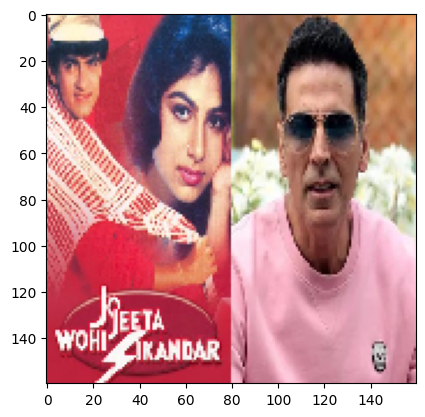

1/1 [==============================] - 4s 4s/step
Virat Kohli [68.72884]
Akshay Kumar [13.611166]
Henry Cavill [3.7994642]
Robert Downey Jr [2.3282464]


In [ ]:
!wget -O test.jpg https://d30ny7ijak9wq4.cloudfront.net/s3fs-public/images/movie_image/2021/05/22/akshy.jpg

image = tf.keras.preprocessing.image.load_img('test.jpg', target_size=(160, 160))
image = tf.keras.preprocessing.image.img_to_array(image)
plt.imshow(image.astype('int'))
plt.show()
image = np.expand_dims(image, axis=0)
result = final_model.predict(image)
data = train_idg.class_indices
for i in list(np.argsort(result)[:,:-5:-1][0]):
  print(list(data.keys())[i],result[:,i]*100)

Testing the model on randomly selected images from opensource for each label.

In [ ]:
!unzip -q Test.zip

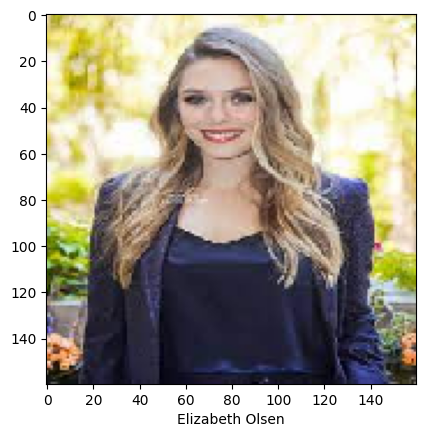

1/1 [==============================] - 0s 207ms/step
Margot Robbie [25.138214]
Elizabeth Olsen [21.070623]
Claire Holt [19.590641]
Natalie Portman [13.717145]


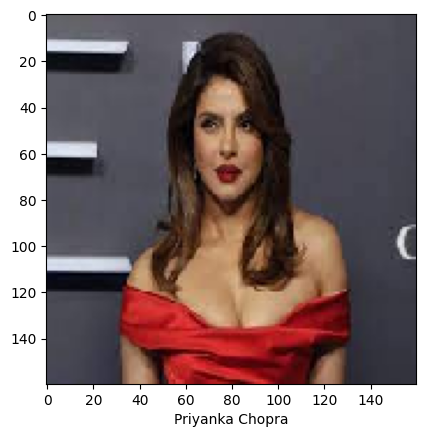

1/1 [==============================] - 0s 32ms/step
Camila Cabello [20.883453]
Elizabeth Olsen [19.726967]
Alexandra Daddario [16.324303]
Natalie Portman [12.197899]


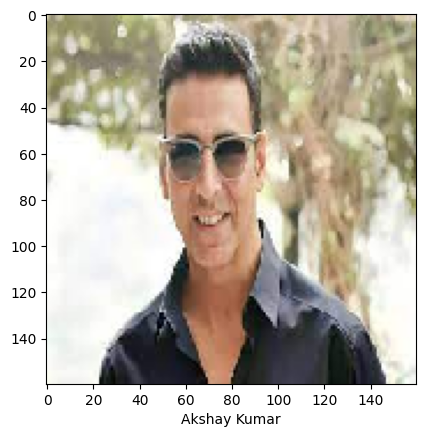

1/1 [==============================] - 0s 36ms/step
Akshay Kumar [98.704414]
Tom Cruise [0.29132062]
Amitabh Bachchan [0.27666697]
Henry Cavill [0.25468]


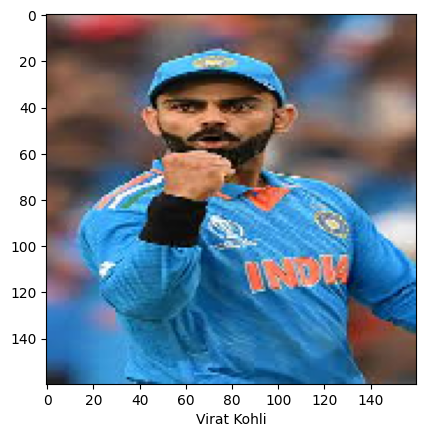

1/1 [==============================] - 0s 45ms/step
Virat Kohli [99.993286]
Vijay Deverakonda [0.00423444]
Roger Federer [0.00223378]
Hugh Jackman [0.00014201]


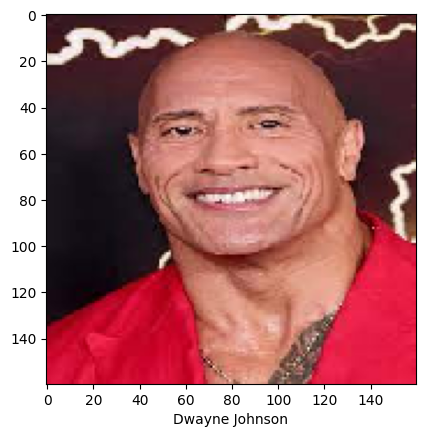

1/1 [==============================] - 0s 35ms/step
Dwayne Johnson [54.15744]
Brad Pitt [11.675029]
Ellen Degeneres [11.535234]
Akshay Kumar [9.562735]


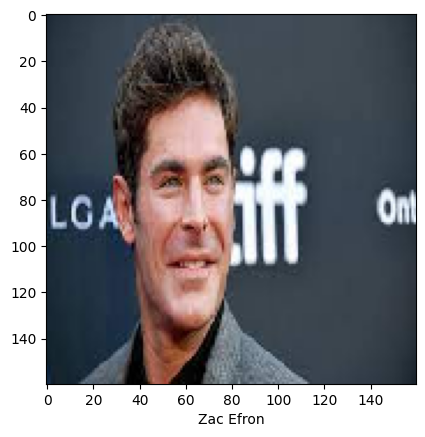

1/1 [==============================] - 0s 33ms/step
Tom Cruise [59.23299]
Akshay Kumar [14.716177]
Henry Cavill [10.89008]
Hugh Jackman [7.408153]


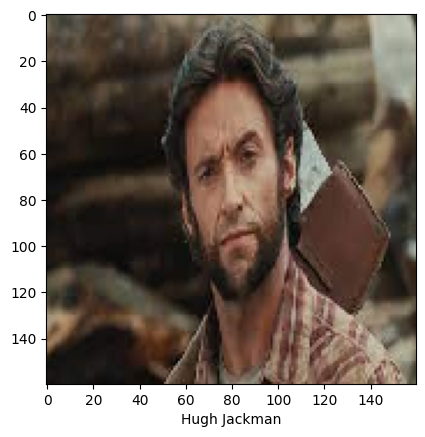

1/1 [==============================] - 0s 36ms/step
Virat Kohli [88.353874]
Hrithik Roshan [5.676921]
Amitabh Bachchan [1.2944696]
Zac Efron [0.896487]


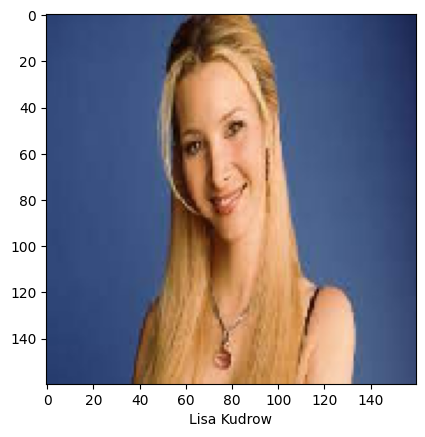

1/1 [==============================] - 0s 47ms/step
Lisa Kudrow [54.5464]
Charlize Theron [24.928822]
Margot Robbie [16.64375]
Akshay Kumar [2.1628325]


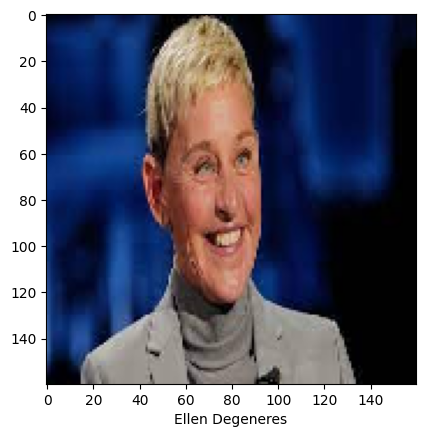

1/1 [==============================] - 0s 46ms/step
Ellen Degeneres [85.146645]
Hrithik Roshan [2.4870417]
Dwayne Johnson [2.3946655]
Virat Kohli [1.8988786]


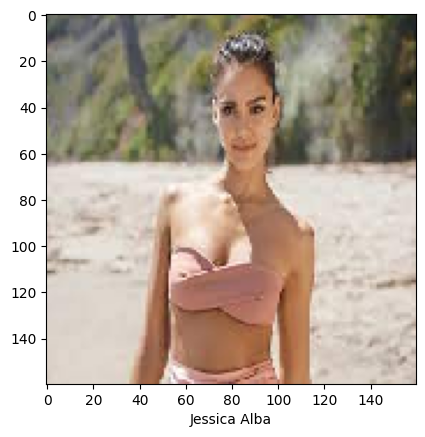

1/1 [==============================] - 0s 32ms/step
Priyanka Chopra [18.000826]
Alexandra Daddario [12.390581]
Camila Cabello [11.702786]
Charlize Theron [11.37202]


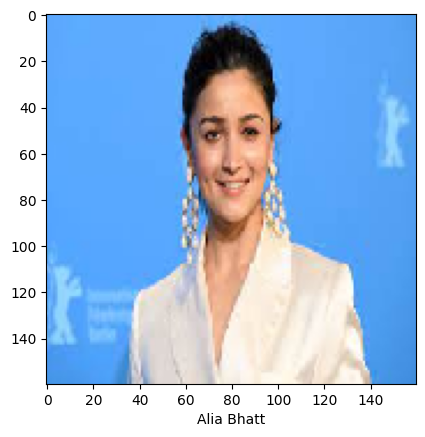

1/1 [==============================] - 0s 35ms/step
Akshay Kumar [95.560135]
Vijay Deverakonda [1.0889393]
Kashyap [0.7192197]
Anushka Sharma [0.59617954]


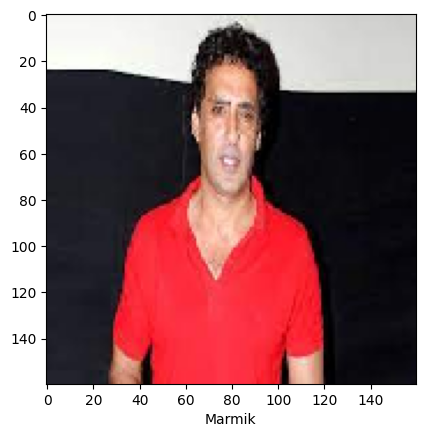

1/1 [==============================] - 0s 36ms/step
Akshay Kumar [89.37897]
Hrithik Roshan [2.913206]
Dwayne Johnson [2.8463516]
Andy Samberg [1.1123832]


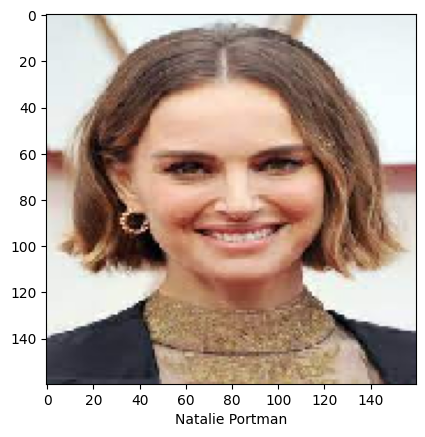

1/1 [==============================] - 0s 41ms/step
Margot Robbie [57.22172]
Natalie Portman [15.949258]
Alexandra Daddario [6.788893]
Charlize Theron [6.343689]


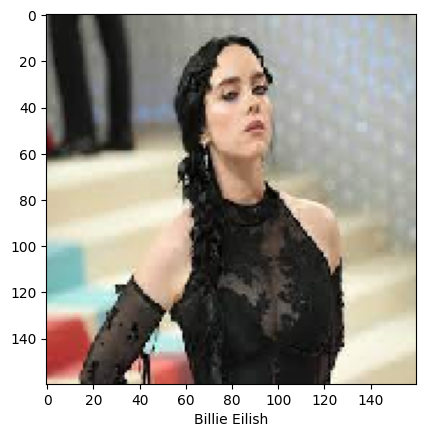

1/1 [==============================] - 0s 60ms/step
Camila Cabello [64.7903]
Kashyap [5.8561406]
Jessica Alba [4.1162515]
Alexandra Daddario [4.0212197]


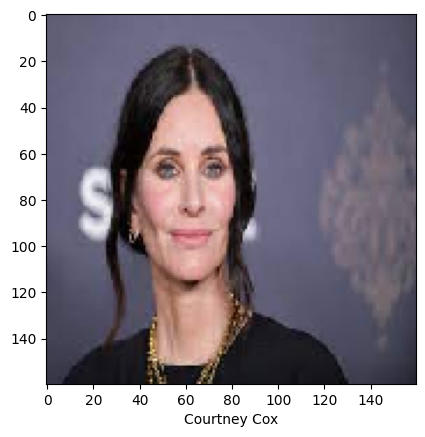

1/1 [==============================] - 0s 32ms/step
Charlize Theron [41.60058]
Billie Eilish [21.285614]
Alexandra Daddario [9.691799]
Camila Cabello [8.27953]


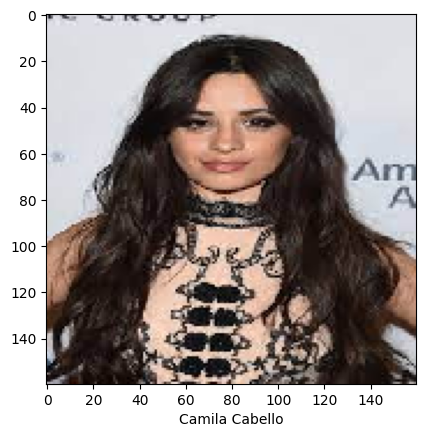

1/1 [==============================] - 0s 50ms/step
Camila Cabello [89.17179]
Alexandra Daddario [10.299944]
Priyanka Chopra [0.27142146]
Elizabeth Olsen [0.07191055]


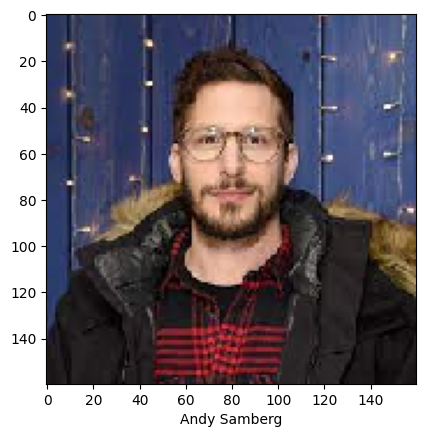

1/1 [==============================] - 0s 42ms/step
Andy Samberg [76.26624]
Marmik [8.36316]
Akshay Kumar [3.193089]
Hrithik Roshan [3.0911646]


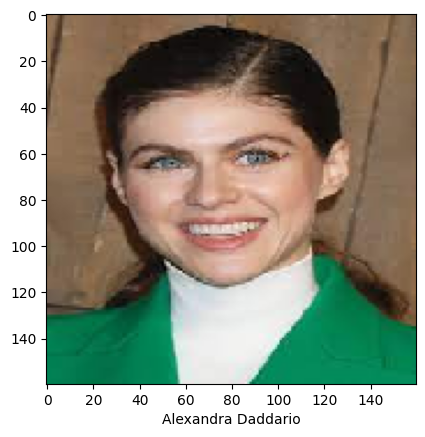

1/1 [==============================] - 0s 40ms/step
Hugh Jackman [45.86427]
Akshay Kumar [22.85408]
Dwayne Johnson [6.7500725]
Amitabh Bachchan [3.862527]


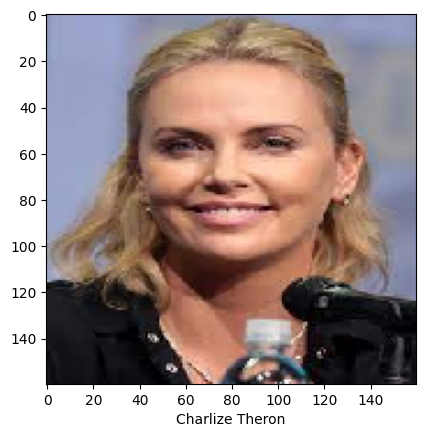

1/1 [==============================] - 0s 46ms/step
Charlize Theron [50.027805]
Akshay Kumar [23.61146]
Lisa Kudrow [11.458878]
Margot Robbie [4.0431433]


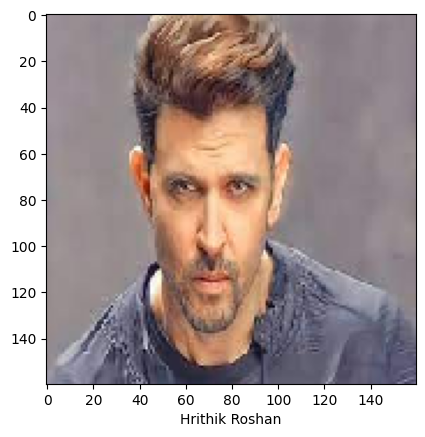

1/1 [==============================] - 0s 43ms/step
Vijay Deverakonda [58.56952]
Akshay Kumar [29.343021]
Hrithik Roshan [6.703473]
Tom Cruise [1.2935739]


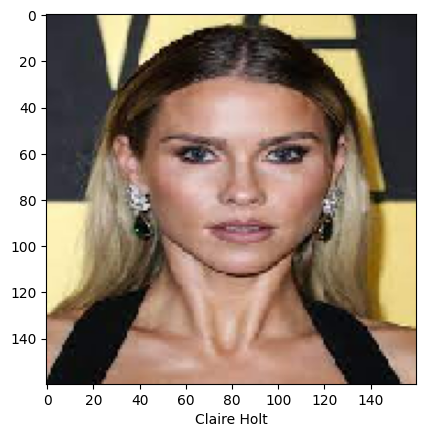

1/1 [==============================] - 0s 38ms/step
Elizabeth Olsen [36.786835]
Margot Robbie [34.118664]
Akshay Kumar [7.110072]
Natalie Portman [5.0892363]


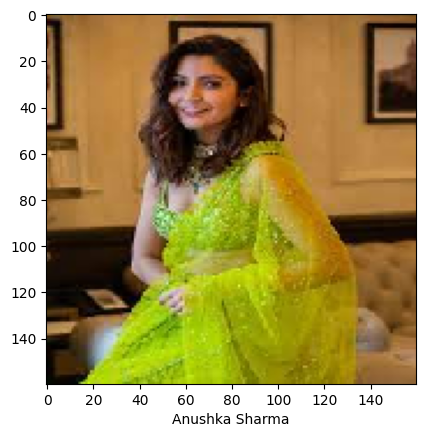

1/1 [==============================] - 0s 46ms/step
Anushka Sharma [55.491573]
Billie Eilish [12.943013]
Camila Cabello [9.131871]
Priyanka Chopra [5.851566]


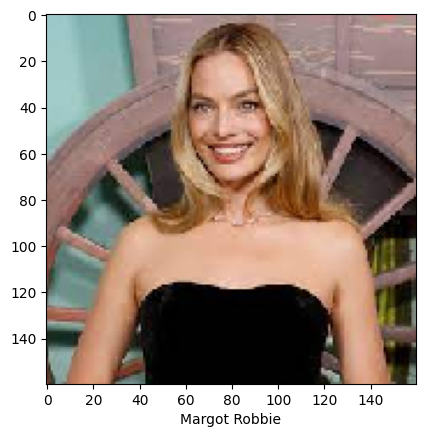

1/1 [==============================] - 0s 73ms/step
Lisa Kudrow [86.16033]
Elizabeth Olsen [8.78614]
Margot Robbie [3.1830914]
Natalie Portman [0.66924316]


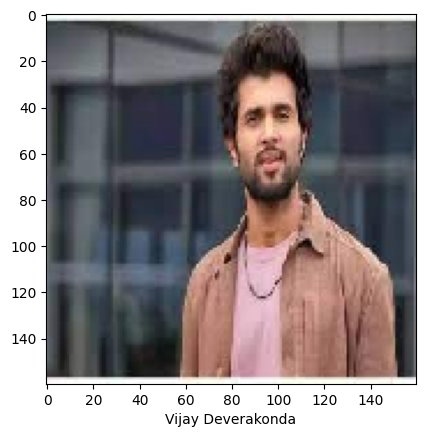

1/1 [==============================] - 0s 70ms/step
Akshay Kumar [85.38117]
Hrithik Roshan [4.2426434]
Dwayne Johnson [2.4141572]
Henry Cavill [1.7493917]


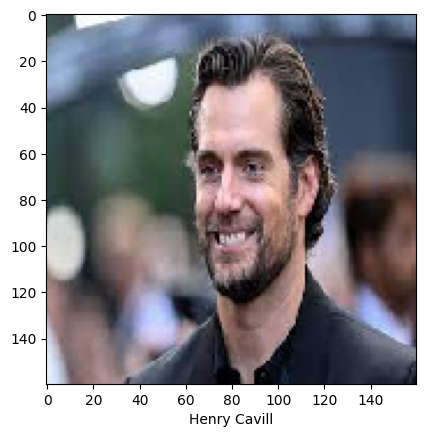

1/1 [==============================] - 0s 46ms/step
Hugh Jackman [55.229713]
Zac Efron [22.168612]
Tom Cruise [7.222817]
Brad Pitt [7.196913]


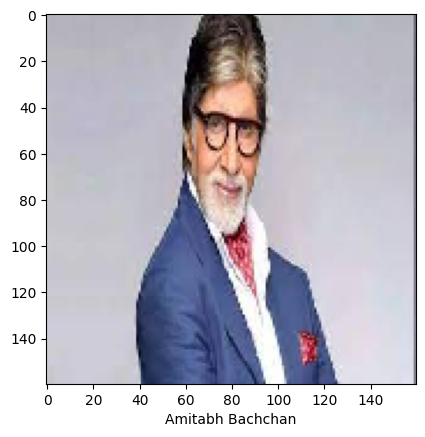

1/1 [==============================] - 0s 68ms/step
Amitabh Bachchan [99.43131]
Tom Cruise [0.17879626]
Vijay Deverakonda [0.11745903]
Hugh Jackman [0.06118434]


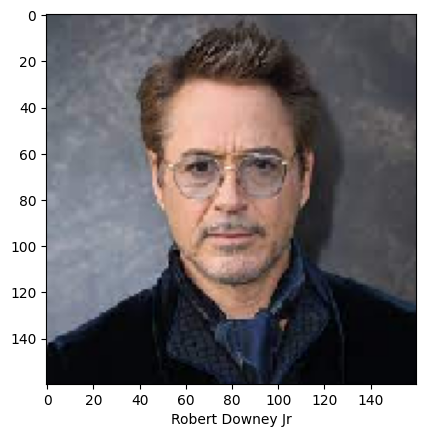

1/1 [==============================] - 0s 81ms/step
Robert Downey Jr [53.129124]
Tom Cruise [21.336037]
Andy Samberg [6.193259]
Akshay Kumar [5.462877]


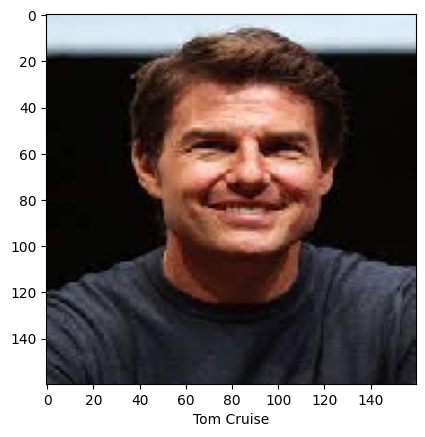

1/1 [==============================] - 0s 50ms/step
Hugh Jackman [57.804913]
Tom Cruise [23.484547]
Henry Cavill [9.229904]
Vijay Deverakonda [4.708508]


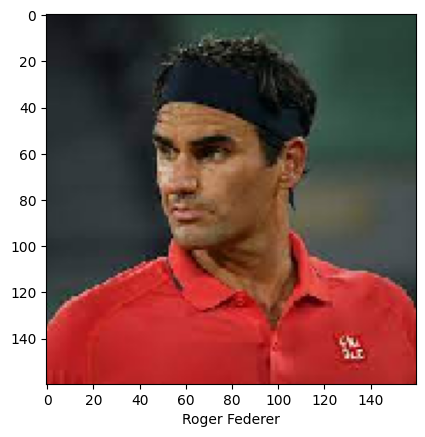

1/1 [==============================] - 0s 46ms/step
Roger Federer [59.443863]
Virat Kohli [23.360859]
Akshay Kumar [7.9036274]
Marmik [4.797125]


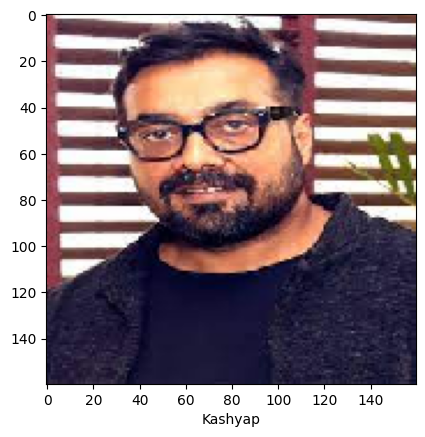

1/1 [==============================] - 0s 56ms/step
Akshay Kumar [43.911022]
Robert Downey Jr [36.21083]
Andy Samberg [6.2055016]
Henry Cavill [4.652256]


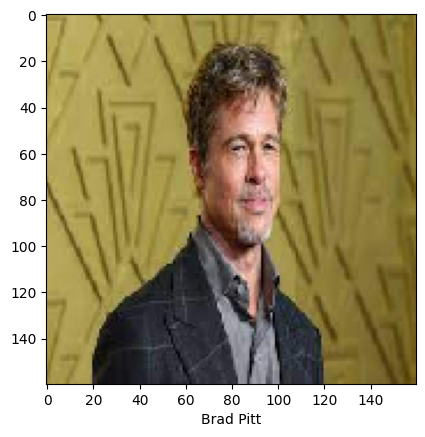

1/1 [==============================] - 0s 56ms/step
Amitabh Bachchan [34.33902]
Akshay Kumar [16.590483]
Hrithik Roshan [15.010968]
Ellen Degeneres [8.237036]


In [ ]:
y_true = []
y_pred = []
for i in range(len(feat)):
  image = tf.keras.preprocessing.image.load_img(f'Test/{feat[i]}.jfif', target_size=(160, 160))
  image = tf.keras.preprocessing.image.img_to_array(image)
  plt.imshow(image.astype('int'))
  plt.xlabel(feat[i].split(".")[0])
  y_true.append(feat[i].split(".")[0])
  plt.show()
  image = np.expand_dims(image, axis=0)
  result = final_model.predict(image)
  y_pred.append({v: k for k, v in train_idg.class_indices.items()}[np.argsort(result[0])[-1]])
  data = train_idg.class_indices
  for j in np.argsort(result[0])[:-5:-1]:
    print({v: k for k, v in train_idg.class_indices.items()}[j],result[:,i]*100)

In [ ]:
result = pd.DataFrame({"y_true":y_true,'y_pred':y_pred})

In [ ]:
len(result[(result['y_true']==result['y_pred'])])/len(result)*100

38.70967741935484